# Fake news detection on Hindi news articles using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_hindi = pd.read_csv('Updated_v1/train.csv')
data_hindi.dropna(inplace = True)
data_hindi.head(5)

,Unnamed: 0,id,title,text,author,label
0,0,13867,गायिका काया जोन्स ने ट्रम्प के लिए किया समर्थन...,गायिका और डीजे काया जोन्स ने इस हफ्ते डोनाल्ड ...,डैनियल नुसबम,0
1,1,13868,रवेन्स के मालिक स्टीव बिसियोट्टी: एनएफएल को पा...,"""यह होने वाला नहीं है"" विभाग से, बाल्टीमोर रेव...",रॉबर्ट जे। मार्लो,0
2,2,13869,टिलरसन: फिलिस्तीनी प्राधिकरण आतंकवादियों को भु...,टाइम्स ऑफ इज़राइल की रिपोर्ट: वॉशिंगटन - अमेरि...,ब्रेइटबार्ट जेरूसलम,0
3,3,13870,संतरे के लिए सेब - पहले 100 दिन की योजनाओं में...,राष्ट्रपति चुनाव में एक विशेष विषय उनके पहले 1...,नताली डेली,1
6,6,13873,डोनाल्ड ट्रम्प के अभियान में शांत फिक्सर: उनके...,"अंतर्राष्ट्रीय कूटनीति सावधान अनुष्ठानों, पदान...",माइकल बारबरो और जोनाथन महलर,0


In [3]:
#column = ['id']
data_hindi = data_hindi.drop(columns='id')
input_array=np.array(data_hindi['title'])

data_hindi.head()


,Unnamed: 0,title,text,author,label
0,0,गायिका काया जोन्स ने ट्रम्प के लिए किया समर्थन...,गायिका और डीजे काया जोन्स ने इस हफ्ते डोनाल्ड ...,डैनियल नुसबम,0
1,1,रवेन्स के मालिक स्टीव बिसियोट्टी: एनएफएल को पा...,"""यह होने वाला नहीं है"" विभाग से, बाल्टीमोर रेव...",रॉबर्ट जे। मार्लो,0
2,2,टिलरसन: फिलिस्तीनी प्राधिकरण आतंकवादियों को भु...,टाइम्स ऑफ इज़राइल की रिपोर्ट: वॉशिंगटन - अमेरि...,ब्रेइटबार्ट जेरूसलम,0
3,3,संतरे के लिए सेब - पहले 100 दिन की योजनाओं में...,राष्ट्रपति चुनाव में एक विशेष विषय उनके पहले 1...,नताली डेली,1
6,6,डोनाल्ड ट्रम्प के अभियान में शांत फिक्सर: उनके...,"अंतर्राष्ट्रीय कूटनीति सावधान अनुष्ठानों, पदान...",माइकल बारबरो और जोनाथन महलर,0


In [4]:
len(input_array)

12362

In [5]:
input_array[24].split()

['सेंट',
 'पीटर्सबर्ग',
 'के',
 'पास',
 'रोमनोव',
 'महल',
 'को',
 'बहाल',
 'करने',
 'के',
 'लिए',
 'रूसी',
 'तेल',
 'विशाल',
 'रोज़नेफ्ट']

In [6]:
# stopwords
hindi =[
 'अत','अपना','अपनी','अपने','अभी','अंदर','आदि','आप','इत्यादि','इन','इनका','इन्हीं','इन्हें','इन्हों','इस','इसका','इसकी','इसके','इसमें',
'इसी','इसे','उन','उनका','उनकी','उनके','उनको','उन्हीं','उन्हें','उन्हों','उस','उसके','उसी','उसे','एक','एवं','एस','ऐसे','और','कई',
'कर','करता','करते','करना','करने','करें','कहते','कहा','का','काफ़ी','कि','कितना','किन्हें','किन्हों','किया','किर','किस','किसी','किसे','की',
'कुछ','कुल','के','को','कोई','कौन','कौन','बही','बहुत','बाद','बाला','बिलकुल','भी','भीतर','मगर','मानो','मे','में','यदि','यह','यहाँ','यही',
'या','यिह','ये','रखें','रहा','रहे','ऱ्वासा','लिए','लिये','लेकिन','व','वग़ैरह','वर्ग','वह','वहाँ','वहीं','वाले','वुह','वे','सकता','सकते','सबसे',
'सभी','साथ','साबुत','साभ','सारा','से','सो','संग','ही','हुआ','हुई','हुए','है','हैं','हो','होता','होती','होते','होना','होने']

In [7]:
import re
import nltk
# ltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 12362):
    review = input_array[i]
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(hindi)]
    review = ' '.join(review)
    corpus.append(review)
corpus[:10]

["गायिका काया जोन्स ने ट्रम्प समर्थन, 'ताकत' जॉय विला धन्यवाद",
 'रवेन्स मालिक स्टीव बिसियोट्टी: एनएफएल पानी देने योग्य बनाने विज्ञापनों कटौती - ब्रेइटबार्ट',
 'टिलरसन: फिलिस्तीनी प्राधिकरण आतंकवादियों भुगतान पर inian इरादा ’',
 'संतरे सेब - पहले 100 दिन योजनाओं कठोर अंतर (वीडियो)',
 'डोनाल्ड ट्रम्प अभियान शांत फिक्सर: दामाद, जारेड कुशनर - द न्यूयॉर्क टाइम्स',
 'मुख्य रूप साइबरबली रूप ट्रम्प? यूनियन बॉस पर ट्विटर हमला आग - न्यूयॉर्क टाइम्स',
 'सब ऋग्वेद - चुनाव छोड़कर',
 'डियर मेनस्ट्रीम मीडिया: यू मेड दीपस्टेटगेट हैपन - ब्रेइटबार्ट',
 'हिलेरी क्लिंटन, एफबीआई रियल नवंबर आश्चर्य: सूचना',
 "रिपब्लिकन घर डेमोक्रेट 'गन-कंट्रोल सीट-इन टर्न्ट चॉइस शो-इन द न्यू यॉर्क टाइम्स"]

In [8]:
print(type(corpus))

<class 'list'>


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()
y = data_hindi.iloc[0:12362, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
len(X_train),len(y_train),len(X_test),len(y_test)

(9889, 9889, 2473, 2473)

In [12]:
# Printer
def printer(name):
    ax= plt.subplot()
    confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    name = 'Confusion Matrix - ' + name
    ax.set_title(name, size=16)
    plt.savefig('2-confusion matrix.jpg',bbox_inches = 'tight',transparent=True)
    plt.show()
    ax= plt.subplot()
    confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'], margins = True)
    ax.set_title(name, size=16)
    sn.heatmap(confusion_matrix, annot=True)
    plt.savefig('3-confusion matrix.jpg',bbox_inches = 'tight',transparent=True)
    plt.show()
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    auc = roc_auc_score(y_test,probs)
    print(auc)
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('roc curve.jpg',bbox_inches = 'tight',transparent=True)
    plt.show()

## Random Forest Tree Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model = classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_predR = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predR)

from sklearn.metrics import accuracy_score
score_rftc = accuracy_score(y_test,y_predR)

print(score_rftc)
print(cm3)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, RandomForestClassifier())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predR,labels=[1,0])
print('Classification report : \n',matrix)


0.8823291548726243
[[1193  185]
 [ 106  989]]
[-0.1071573  -0.10432673 -0.09587379 -0.11165049 -0.09263754]
Mean Absolute Error 0.102329
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.90      0.87      1095
           0       0.92      0.87      0.89      1378

    accuracy                           0.88      2473
   macro avg       0.88      0.88      0.88      2473
weighted avg       0.88      0.88      0.88      2473



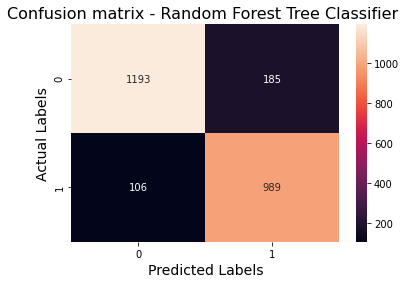

In [14]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm3, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Random Forest Tree Classifier ', size=16)
plt.savefig('2-confusion matrix rftc.jpg',bbox_inches = 'tight',transparent=True)
plt.show()




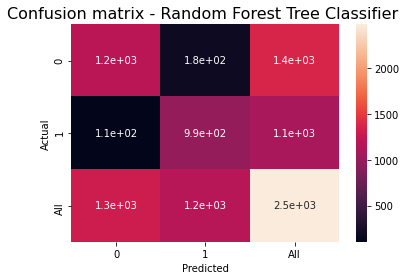

In [15]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
confusion_matrix = pd.crosstab(y_test,y_predR, rownames=['Actual'], colnames=['Predicted'], margins = True)
ax.set_title('Confusion matrix - Random Forest Tree Classifier ', size=16)
sn.heatmap(confusion_matrix, annot=True)
plt.savefig('3-confusion matrix rftc.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

0.9446958400434751


D:\Software\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 0.9446958400434751 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


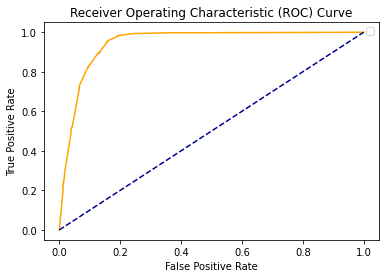

In [16]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve rftc.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

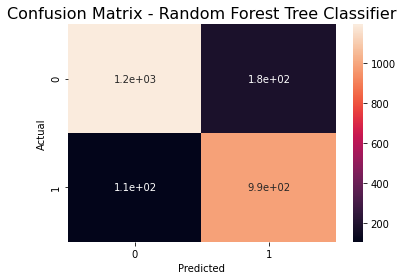

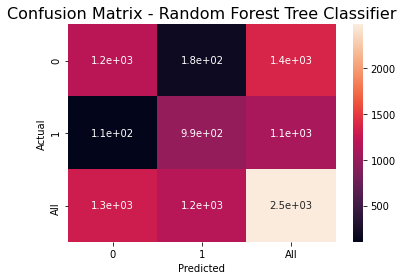

0.9446958400434751


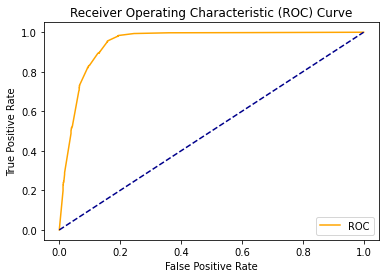

In [17]:
name = 'Random Forest Tree Classifier'
printer(name)

## Gaussian Naive Bayes

In [18]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model = classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
score_gnb = accuracy_score(y_test,y_pred)

print(score_gnb)
print(cm)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, GaussianNB())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))


# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)


0.5539830165790538
[[379 999]
 [104 991]]
[-0.43509907 -0.39506672 -0.44619741 -0.43770227 -0.42880259]
Mean Absolute Error 0.428574
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.91      0.64      1095
           0       0.78      0.28      0.41      1378

    accuracy                           0.55      2473
   macro avg       0.64      0.59      0.52      2473
weighted avg       0.66      0.55      0.51      2473



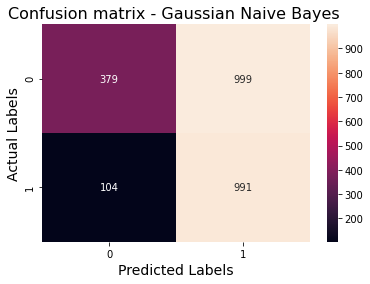

In [19]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Gaussian Naive Bayes ', size=16)
plt.savefig('2-confusion matrix Gaussian Naive Bayes.jpg',bbox_inches = 'tight',transparent=True)
plt.show()


0.5895928186571764


D:\Software\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 0.5895928186571764 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


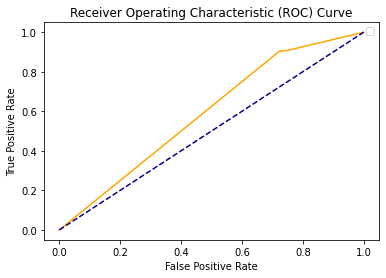

In [20]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve gnb.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
model = classifier1.fit(X_train, y_train)

# Predicting the Test set results
y_predL = classifier1.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predL)
from sklearn.metrics import accuracy_score
score_lr = accuracy_score(y_test,y_predL)

print(score_lr)
print(cm1)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, LogisticRegression())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predL,labels=[1,0])
print('Classification report : \n',matrix)


0.898099474322685
[[1173  205]
 [  47 1048]]
[-0.10877477 -0.11362717 -0.09789644 -0.11084142 -0.08778317]
Mean Absolute Error 0.103785
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.96      0.89      1095
           0       0.96      0.85      0.90      1378

    accuracy                           0.90      2473
   macro avg       0.90      0.90      0.90      2473
weighted avg       0.91      0.90      0.90      2473



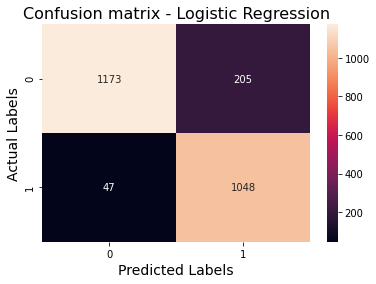

In [22]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predL, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm1, annot=True,fmt='g')
ax.set_title('Confusion matrix - Logistic Regression', size=16)
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
plt.savefig('2-confusion matrix Logistic Regression.jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.9488246482560257


D:\Software\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 0.9488246482560257 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


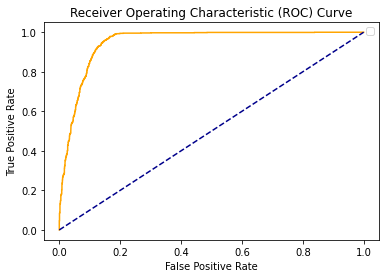

In [23]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve Logistic Regression.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

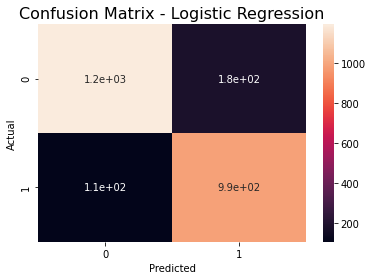

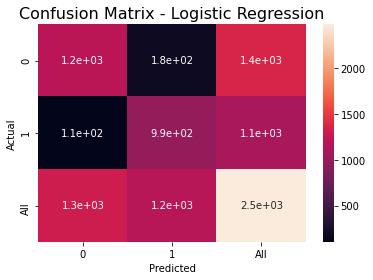

0.9488246482560257


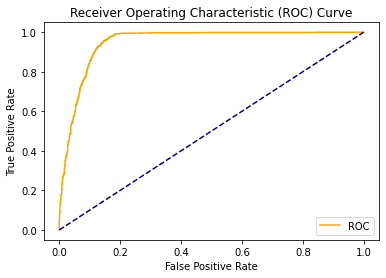

In [24]:
name = 'Logistic Regression'
printer(name)

## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model = classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_predD = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predD)
from sklearn.metrics import accuracy_score
score_dtc = accuracy_score(y_test,y_predD)

print(score_dtc)

print(cm2)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, DecisionTreeClassifier())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predD,labels=[1,0])
print('Classification report : \n',matrix)


0.8726243429033562
[[1192  186]
 [ 129  966]]
[-0.14112414 -0.13748484 -0.12904531 -0.14482201 -0.12257282]
Mean Absolute Error 0.135010
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.88      0.86      1095
           0       0.90      0.87      0.88      1378

    accuracy                           0.87      2473
   macro avg       0.87      0.87      0.87      2473
weighted avg       0.87      0.87      0.87      2473



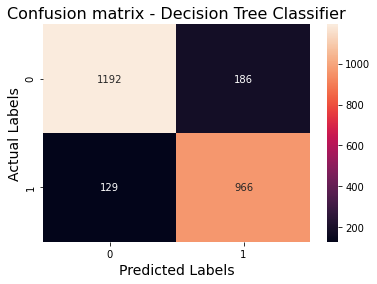

In [26]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predD, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm2, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Decision Tree Classifier', size=16)
plt.savefig('2-confusion matrix Decision Tree Classifier.jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.8842419362321147


D:\Software\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 0.8842419362321147 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


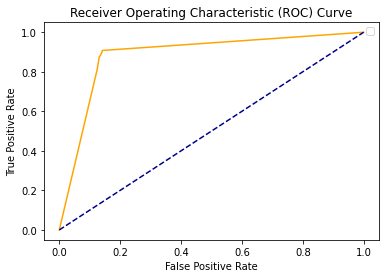

In [27]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve Decision Tree Classifier.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

## Support Vector Machine(SVM)

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',probability=True, random_state = 0)
model = classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predS = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_predS)
from sklearn.metrics import accuracy_score
score_svm = accuracy_score(y_test,y_predS)

print(score_svm)
print(cm5)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, SVC())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))


# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predS,labels=[1,0])
print('Classification report : \n',matrix)


0.9021431459765467
[[1187  191]
 [  51 1044]]
[-0.11443591 -0.11362717 -0.09991909 -0.11488673 -0.09385113]
Mean Absolute Error 0.107344
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.95      0.90      1095
           0       0.96      0.86      0.91      1378

    accuracy                           0.90      2473
   macro avg       0.90      0.91      0.90      2473
weighted avg       0.91      0.90      0.90      2473



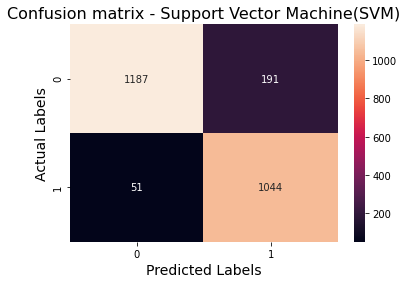

In [29]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predS, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm5, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - Support Vector Machine(SVM)', size=16)
plt.savefig('2-confusion matrix Support Vector Machine(SVM).jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.945846670775593


D:\Software\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 0.945846670775593 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


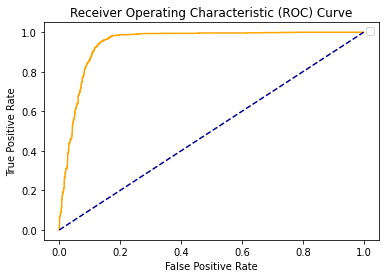

In [30]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve Support Vector Machine(SVM).jpg',bbox_inches = 'tight',transparent=True)
plt.show()

## K-Nearest Neighbour

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model = classifier4.fit(X_train, y_train)

# Predicting the Test set results
y_predK = classifier4.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_predK)
from sklearn.metrics import accuracy_score
score_knn = accuracy_score(y_test,y_predK)

print(score_knn)
print(cm4)

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
my_pipeline = make_pipeline(imputer, KNeighborsClassifier())

from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)
print('Mean Absolute Error %2f' %(-1 * scores.mean()))


# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_predK,labels=[1,0])
print('Classification report : \n',matrix)


0.8208653457339264
[[ 971  407]
 [  36 1059]]
[-0.18560453 -0.18358269 -0.18203883 -0.1868932  -0.16504854]
Mean Absolute Error 0.180634
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.97      0.83      1095
           0       0.96      0.70      0.81      1378

    accuracy                           0.82      2473
   macro avg       0.84      0.84      0.82      2473
weighted avg       0.86      0.82      0.82      2473



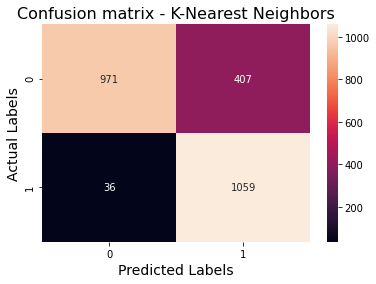

In [32]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
ax= plt.subplot()
plt.style.use('seaborn-pastel')
confusion_matrix = pd.crosstab(y_test,y_predK, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cm4, annot=True,fmt='g')
ax.set_xlabel('Predicted Labels', size=14)
ax.set_ylabel('Actual Labels', size=14)
ax.set_title('Confusion matrix - K-Nearest Neighbors', size=16)
plt.savefig('2-confusion matrix K-Nearest Neighbors .jpg',bbox_inches = 'tight',transparent=True)
plt.show()



0.8854918451067326


D:\Software\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Legend does not support 0.8854918451067326 instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


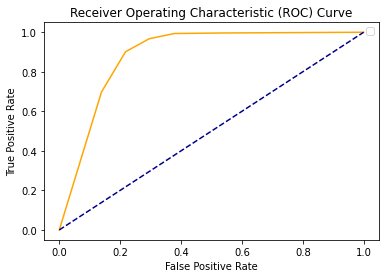

In [33]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
auc = roc_auc_score(y_test,probs)
print(auc)
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend([auc],['roc_acu_score ='])
plt.savefig('roc curve K-Nearest Neighbour.jpg',bbox_inches = 'tight',transparent=True)
plt.show()

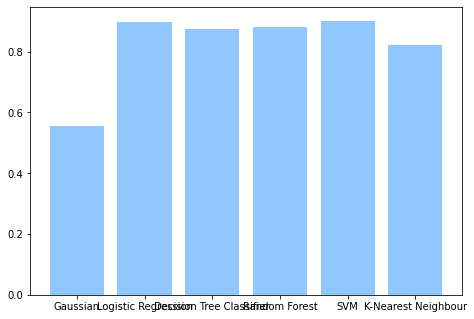

In [34]:
# Visualizations
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Gaussian', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest', 'SVM','K-Nearest Neighbour']
accuracy_score = [score_gnb,score_lr,score_dtc,score_rftc,score_svm,score_knn]
ax.bar(langs,accuracy_score)
plt.show()

In [35]:
accuracy_score

[0.5539830165790538,
 0.898099474322685,
 0.8726243429033562,
 0.8823291548726243,
 0.9021431459765467,
 0.8208653457339264]